In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df.fillna('Age',inplace=True)

<ipython-input-7-6e49cc839211>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Age',inplace=True)


In [8]:
df.drop('Cabin',axis=1,inplace=True)

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Sex
female    233
male      109
Name: Survived, dtype: int64


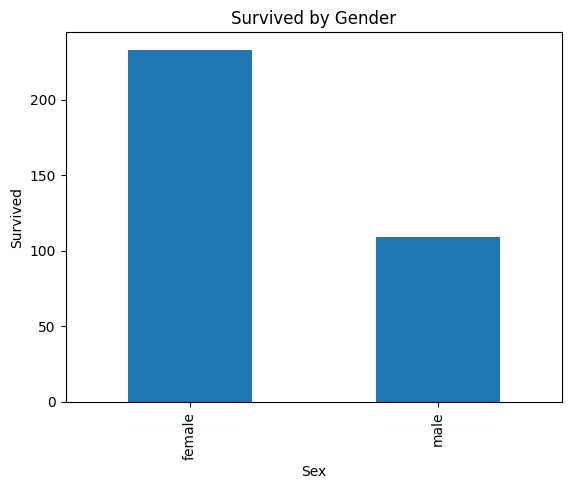

In [10]:
servival_by_gender = df.groupby('Sex')['Survived'].sum()
print(servival_by_gender)

servival_by_gender.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Survived by Gender')
plt.show()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


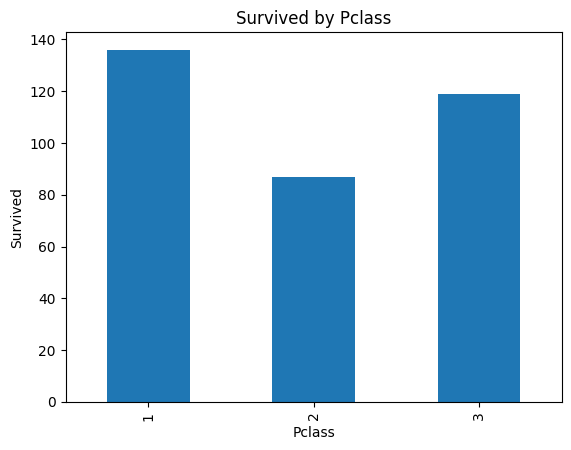

In [11]:
servival_by_pclass = df.groupby('Pclass')['Survived'].sum()
print(servival_by_pclass)

servival_by_pclass.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('Survived by Pclass')
plt.show()

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,21,1,0,523,7.2500,3
1,2,1,1,190,0,45,1,0,596,71.2833,1
2,3,1,3,353,0,27,0,0,669,7.9250,3
3,4,1,1,272,0,41,1,0,49,53.1000,3
4,5,0,3,15,1,41,0,0,472,8.0500,3


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Logistic Regression

In [19]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.770949720670391


# Random Forest Classifier

In [25]:
reg = RandomForestClassifier()
reg.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
y_pred1 = reg.predict(X_test)

In [27]:
accuracy_reg = accuracy_score(y_test,y_pred1)
print(accuracy_reg)

0.8435754189944135


In [75]:
accuracy_percentage = accuracy_reg * 100
print(accuracy_percentage)

84.35754189944134


# Hyperparameter Tuning Random Forest

In [42]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [45]:
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5)


In [46]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [47]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [48]:
best_model = grid_search.best_estimator_

In [49]:
y_pred_best = best_model.predict(X_test)

In [50]:
accuracy_best = accuracy_score(y_test, y_pred_best)
print(accuracy_best)

0.8547486033519553


In [76]:
accuracy_best_percentage = accuracy_best * 100
print(accuracy_best_percentage)

85.47486033519553


# XGBoost Classifier

In [28]:
import xgboost as xgb

In [29]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
y_pred2 = xgb_model.predict(X_test)

In [31]:
accuracy_xgb = accuracy_score(y_test,y_pred2)
print(accuracy_xgb)

0.8268156424581006


# SVM

In [38]:
model_svm = SVC()
model_svm.fit(X_train,y_train)

SVC()

In [39]:
y_pred3 = model_svm.predict(X_test)

In [40]:
accuracy_svm = accuracy_score(y_test,y_pred3)
print(accuracy_svm)

0.6759776536312849


# Test Data

In [51]:
test_df = pd.read_csv('/content/test.csv')

In [52]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [54]:
test_df.shape

(418, 11)

In [55]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [60]:
test_df.fillna(0, inplace=True)

In [63]:
test_df.drop('Cabin',axis=1,inplace=True)

In [64]:
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [65]:
for col in test_df.columns:
  if test_df[col].dtype == 'object':
    test_df[col] = test_df[col].astype(str)
    test_df[col] = le.fit_transform(test_df[col])

In [66]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,1
1,893,3,403,0,47.0,1,0,221,7.0000,2
2,894,2,269,1,62.0,0,0,73,9.6875,1
3,895,3,408,1,27.0,0,0,147,8.6625,2
4,896,3,178,0,22.0,1,1,138,12.2875,2


In [67]:
y_pred_final = best_model.predict(test_df)

In [68]:
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred_final})

In [69]:
submission_df.to_csv('submission.csv', index=False)

In [71]:
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


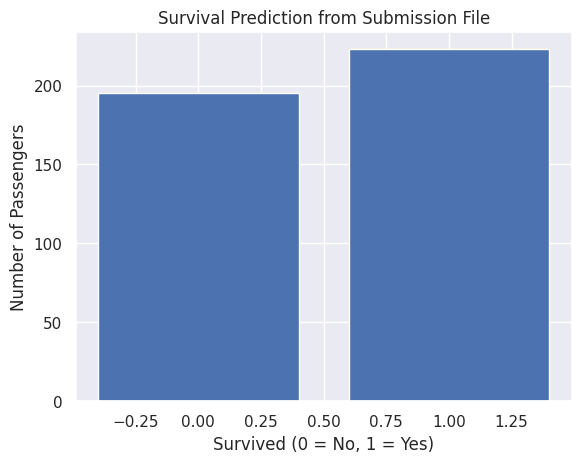

In [74]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'submission.csv' is generated by your code
submission_df = pd.read_csv('submission.csv')

# Group by 'Survived' and count the number of passengers
survival_counts = submission_df.groupby('Survived')['PassengerId'].count()

# Plot the survival counts
plt.bar(survival_counts.index, survival_counts.values)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.title('Survival Prediction from Submission File')
plt.show()